In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
!pip install transformers evaluate datasets requests pandas scikit-learn fair-esm wandb graph-part python-Levenshtein

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 84.0/84.0 kB 9.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 480.6/480.6 kB 33.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 93.1/93.1 kB 10.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 40.0/40.0 kB 3.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 162.6/162.6 kB 17.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 116.3/116.3 kB 13.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 179.3/179.3 kB 20.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 134.8/134.8 kB 15.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 194.1/194.1 kB 21.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.1/3.1 MB 94.8 MB/s eta 0:00:00
  Attempting uninstall: fsspec
    Found existing installation: fsspec 2024.10.0
    Uninstalling fsspec-2024.10.0:
      Successfully uninstalled fsspec-2024.10.0
ERROR: pip's dependency resolver does 

## Preference Modeling

### Homology Partitioning

In [ ]:
# Install mamba and setup conda environment in Google Colab
!pip install -q condacolab
import condacolab
condacolab.install()

# Create a new code cell and run these commands
!mamba install -y -c conda-forge mamba
!mamba create -n myenv -y
!mamba init bash
!source ~/.bashrc
!conda activate myenv
!mamba install -y -c bioconda emboss mmseqs2

⏬ Downloading https://github.com/conda-forge/miniforge/releases/download/23.11.0-0/Mambaforge-23.11.0-0-Linux-x86_64.sh...
📦 Installing...
📌 Adjusting configuration...
🩹 Patching environment...
⏲ Done in 0:00:07
🔁 Restarting kernel...

Looking for: ['mamba']

[+] 0.0s
[+] 0.1s
conda-forge/linux-64   1%
conda-forge/noarch    ⣾  [+] 0.2s
conda-forge/linux-64  13%
conda-forge/noarch    26%[+] 0.3s
conda-forge/linux-64  27%
conda-forge/noarch    46%[+] 0.4s
conda-forge/linux-64  33%
conda-forge/noarch    84%[+] 0.5s
conda-forge/linux-64  41%
conda-forge/noarch   100%conda-forge/noarch                                
[+] 0.6s
conda-forge/linux-64  48%[+] 0.7s
conda-forge/linux-64  69%[+] 0.8s
conda-forge/linux-64  92%[+] 0.9s
conda-forge/linux-64  92%[+] 1.0s
conda-forge/linux-64  92%[+] 1.1s
conda-forge/linux-64  92%conda-forge/linux-64                              

Pinned packages:
  - python 3.10.*
  - python 3.10.*
  - python_abi 3.10.* *cp310*
  - cuda-version 12.*


Transaction

  Pr

In [ ]:
from graph_part import train_test_validation_split, stratified_k_fold
from sys import exit
import condacolab
import pandas as pd

In [ ]:
df = pd.read_excel('/content/1-s2.0-S0092867420315415-mmc4.xlsx', sheet_name='NucAct_data')
# normalize to 0 - 100
df['Avg Act'] = (df['Avg Act'] - df['Avg Act'].min()) / (df['Avg Act'].max() - df['Avg Act'].min()) * 100 + 1e-6
# dropna for Avg Act and Sequence
df = df.dropna(subset=['Avg Act', 'Extended Domain sequence'])
df = df.reset_index(drop=True)
df.to_csv('tf_library_annotated.csv', index=False)

In [ ]:
import pandas as pd
df = pd.read_csv('/content/tf_library_annotated.csv')
sequences = df['Extended Domain sequence'].tolist()
train_idx, test_idx, valid_idx = train_test_validation_split(sequences,
                                                             alignment_mode='needle',
                                                             threads = 8,
                                                             threshold = 0.5,
                                                             test_size = 0.15,
                                                             valid_size = 0.05,
                                                            )


Computing pairwise sequence identities.


  0%|          | 0/20043529 [00:00<?, ?it/s]

Full graph nr. of edges: 4168
223 [223]
Initialization mode slow-nn



Initializing: 4477it [00:00, 297189.19it/s]


Edge iteration completed in 0.00 seconds.
Edge sorting competed at 0.01 seconds.



clustering: 100%|██████████| 4168/4168 [00:00<00:00, 49224.98it/s]

1


Currently have this many samples: 4477
After removal we have this many samples: 4477


In [ ]:
import pandas as pd
df = pd.read_csv('/content/tf_library_annotated.csv')
df_train = df.iloc[train_idx]
df_train.to_csv("tf_library_train.csv")
df_val = df.iloc[valid_idx]
df_val.to_csv("tf_library_val.csv")
df_test = df.iloc[test_idx]
df_test.to_csv("tf_library_test.csv")
print(len(train_idx), len(valid_idx), len(test_idx))

3616 211 650


In [ ]:
import pandas as pd
import numpy as np

def filter_unbounded(df, column_name):
    return df[np.isfinite(df[column_name])]

def split_and_save_dataframe(df, train_ratio=0.8, val_ratio=0.05, test_ratio=0.15, train_file='train.csv', val_file='val.csv', test_file='test.csv'):
    assert train_ratio + val_ratio + test_ratio == 1.0, "The ratios must sum to 1.0"

    df = df.sample(frac=1, random_state=42).reset_index(drop=True)
    # df = filter_unbounded(df, 'Pred_affinity')
    # df = filter_unbounded(df, 'avg_retention_score')
    # df['ret_induc_prod'] = df['avg_retention_score'] * df['avg_induction_score']

    train_size = int(train_ratio * len(df))
    val_size = int(val_ratio * len(df))
    test_size = len(df) - train_size - val_size

    train_df = df.iloc[:train_size]
    val_df = df.iloc[train_size:train_size + val_size]
    test_df = df.iloc[train_size + val_size:]

    train_df.to_csv(train_file, index=False)
    val_df.to_csv(val_file, index=False)
    test_df.to_csv(test_file, index=False)

    return train_df, val_df, test_df

# Example usage
df = pd.read_csv('/content/drive/MyDrive/MITLL_AAlphaBio_Ab_Binding_dataset.csv')
train_df, val_df, test_df = split_and_save_dataframe(df, train_file='ab_library_train.csv', val_file='ab_library_val.csv', test_file='ab_library_test.csv')


In [ ]:
display(train_df.head())

,POI,Sequence,Target,Assay,Replicate,Pred_affinity,HC,LC,CDRH1,CDRH2,CDRH3,CDRL1,CDRL2,CDRL3
0,AAYL51_3283,QAVLTQPSSLSASPGASVSLTCTLRSGINVGTYRIYWYQQKPGSPP...,AlphaNeg1,2,1,3.083028,EVQLVESGGGLVQPGRSLRLSCAASGFTFDDYAMHWVRQAPGKGLE...,QAVLTQPSSLSASPGASVSLTCTLRSGINVGTYRIYWYQQKPGSPP...,GFTFDDYAMH,GISPNSGSIGYADSVK,VGRGGFYFDY,TLRSGINVGTYRIY,YKSDSDKQQGSGV,MIWHSSAWV
1,AAYL51_1667,QAVLTQPSSLSASPGASVSLTCTLRSGINVGTYRIYWYQQKPGSPP...,AlphaNeg3,2,1,NaN,EVQLVESGGGLVQPGRSLRLSCAASGFTFSDYAMHWVRQAPGKGLE...,QAVLTQPSSLSASPGASVSLTCTLRSGINVGTYRIYWYQQKPGSPP...,GFTFSDYAMH,GISWNSGSIGQADSVK,VGRGGGYFDY,TLRSGINVGTYRIY,YKSDSDKQQGSGV,MIWHSSAWV
2,AAYL52_23315,EVQLVESGAEVKKPGASVKVSCKASGYTFTSYGISWVRQAPGQGLE...,AlphaNeg3,2,1,NaN,EVQLVESGAEVKKPGASVKVSCKASGYTFTSYGISWVRQAPGQGLE...,SSELTQDPAVSVALGQTVRITCEGDSLRYYYAQWYQQKPGQAPILV...,GYTFTSYGIS,WISAYNGNTNYAQKLQ,VGRGVIDH,EGDSLRYYYAQ,GWNNRPS,SSRDSSSFQVF
3,AAYL51_10185,QAVLTQPSSLSASPGASVSLTCTLRSGINVGTYRIYWYQQKPGSPP...,AlphaNeg3,2,2,NaN,EVQLVESGGGLVQPGRSLRLSCAASGFIFDDYAMHWVRQAPGKGLE...,QAVLTQPSSLSASPGASVSLTCTLRSGINVGTYRIYWYQQKPGSPP...,GFIFDDYAMH,GISWNSGGIGYADSVK,VGRCGGYFDY,TLRSGINVGTYRIY,YKSDSDKQQGSGV,MIWHSSAWV
4,AAYL52_7633,EVQLVESGAEVKKPGASVKVSCKASGYTFTSYGISWVRQAPGQGLE...,MIT_Target,2,2,NaN,EVQLVESGAEVKKPGASVKVSCKASGYTFTSYGISWVRQAPGQGLE...,SSELTQDPAVSVALGQTVRITCEVDSLYYYYANWYQQKPGQAPILV...,GYTFTSYGIS,WISAYNGNTNYAQKLQ,VGRGVIDH,EVDSLYYYYAN,GKNNRPS,SSRDSSGFQLF


### Model and Finetuning

In [ ]:
import torch
import torch.nn.functional as F
from transformers import AutoModel, EsmForMaskedLM
import esm
from transformers import AutoTokenizer

model_size = (30, '150M')
model_checkpoint = f"facebook/esm2_t{model_size[0]}_{model_size[1]}_UR50D"
EPS = 1e-6

In [ ]:
def get_log_prob(logits, labels, attention_mask):
    log_probs = F.log_softmax(logits, dim=-1)
    gathered_and_apply_attention = torch.gather(log_probs, -1, labels.unsqueeze(-1)).squeeze(-1) * attention_mask

    return gathered_and_apply_attention.mean(dim=-1)

In [ ]:
####################### TELEMETRY ###########################################
tokenizer = AutoTokenizer.from_pretrained(model_checkpoint)

model = EsmForMaskedLM.from_pretrained(model_checkpoint)

sequences = [
    'MVLSPADKTNVKAA',
    'ADKGTVWMLFQHSEG'
]
max_length = 250 #max([len(seq) for seq in sequences])

# Tokenize and pad/truncate the sequences
tokens = tokenizer(sequences, padding="max_length", max_length=max_length, truncation=True, return_tensors="pt")
input_ids = tokens["input_ids"]
attention_mask = tokens["attention_mask"]

outputs = model(input_ids=input_ids, attention_mask=attention_mask)
print(get_log_prob(outputs.logits, input_ids, attention_mask))

del model

####################### TELEMETRY ###########################################


tensor([-0.0236, -0.0359], grad_fn=<MeanBackward1>)


In [ ]:
# DPO Functions
import torch.nn.functional as F

# def get_log_prob(logits, labels):
#     log_probs = F.log_softmax(logits, dim=-1)
#     return torch.gather(log_probs, -1, labels.unsqueeze(-1)).squeeze(-1).mean(-1)

def calculate_DPO_loss(model_prefered_logprob, model_disprefered_logprob,
                       ref_prefered_logprob, ref_disprefered_logprob, strengths,
                       beta=1.0, ipo=True, label_smoothing=0.0, reference_free=False):

    pi_logratios = model_prefered_logprob - model_disprefered_logprob
    ref_logratios = ref_prefered_logprob - ref_disprefered_logprob
    # losses = -F.logsigmoid(beta * logits) = -F.logsigmoid(beta * (pi_logratios - ref_logratios))

    if(reference_free):
      ref_logratios = 0.0
      ref_prefered_logprob = 0.0
      ref_disprefered_logprob = 0.0

    prefered_relative_logprob = model_prefered_logprob - ref_prefered_logprob
    disprefered_relative_logprob = model_disprefered_logprob - ref_disprefered_logprob

    logits = pi_logratios - ref_logratios  # also known as h_{\pi_\theta}^{y_w,y_l}
    reward_accuracies = (prefered_relative_logprob > disprefered_relative_logprob).float().mean(dim=-1)
    reward_margins = (prefered_relative_logprob - disprefered_relative_logprob).mean(dim=-1)
    if(ipo):
        loss = (logits - beta/(2 * strengths)) ** 2  # Eq. 17 of https://arxiv.org/pdf/2310.12036v2.pdf
        loss = loss.mean()
    else:
        loss = strengths * -F.logsigmoid(beta * logits) * (1 - label_smoothing) - F.logsigmoid(-beta * logits) * label_smoothing # -F.logsigmoid(beta * (prefered_relative_logprob - disprefered_relative_logprob)) #
        loss = loss.mean()

    return loss, prefered_relative_logprob.mean(dim=-1), disprefered_relative_logprob.mean(dim=-1), reward_accuracies, reward_margins, pi_logratios, ref_logratios

In [ ]:
import random
# scales column to range specified by low, high
def scale(column, low, high):
    # Step 1: Apply sigmoid scaling based on the mean
    # mean_val = column.mean()
    # sigmoid_scaled = 1 / (1 + np.exp(-10*(column - mean_val)))

    # Step 2: Scale sigmoid values to the specified low and high range
    min_val = column.min()
    max_val = column.max()
    scaled_column = (column - min_val) / (max_val - min_val) * (high - low) + low + 1e-6

    return scaled_column

def sample_combinations(n, k):
    if k > (n * (n - 1)) // 2:
        raise ValueError("k exceeds the number of possible unique pairs")

    # Convert sampled indices to pairs
    pairs = []
    for idx in range(k):
        random_pair = tuple(random.sample(range(n), 2))
        pairs.append(random_pair)

    return pairs

In [ ]:
import torch
from torch.utils.data import Dataset
import pandas as pd
import random
import itertools
from itertools import combinations
import numpy as np
from tqdm import tqdm
from Levenshtein import distance
from collections import defaultdict
import math

def collate_fn(batch, device):
    # Unpack the batch
    prefered_ids, disprefered_ids, prefered_mask, disprefered_mask, strengths = zip(*batch)

    # Stack the tensors
    prefered_ids = torch.stack(prefered_ids).to(device)
    disprefered_ids = torch.stack(disprefered_ids).to(device)
    prefered_mask = torch.stack(prefered_mask).to(device)
    disprefered_mask = torch.stack(disprefered_mask).to(device)
    strengths = torch.tensor(strengths).to(device)

    return {'prefered_ids': prefered_ids,
            'disprefered_ids': disprefered_ids,
            'prefered_mask': prefered_mask,
            'disprefered_mask': disprefered_mask,
            'strengths': strengths}


class TMLibrary(Dataset):
    def __init__(self, file_path, tokenizer, max_length, max_visitations, split, threshold, n_samples):

        data = pd.read_csv(file_path)
        self.seq_key = 'Sequence'
        self.score_key = 'Pred_affinity'
        self.data, self.num_seqs, combination_indexes = self.__process_df__(data, n_samples)
        self.threshold = threshold

        # compute number of combinations for num_seqs
        self.combination_indexes, self.num_samples = self.filter_combination_indexes(combination_indexes, split)

        self.observed_seqs = defaultdict(int)
        self.tokenizer = tokenizer
        self.tokenized = self.tokenizer(self.data[self.seq_key].tolist(), padding=True, return_tensors="pt", max_length=max_length, truncation=True )
        self.max_visitations = max_visitations


    def __process_df__(self, df, n_samples):
        df.dropna(subset=[self.seq_key, self.score_key])
        df = df[df[self.score_key].apply(np.isfinite)]

        self.modified_score_key = 'transformed_' + self.score_key
        df[self.modified_score_key] = scale(df[self.score_key], 1.0, math.e**(10))

        combination_indexes = sample_combinations(len(df), n_samples)#list(combinations(range(self.num_seqs), 2))
        return df, len(df), combination_indexes

    def filter_combination_indexes(self, index_pairs, split):

        # preare dataframe
        index1, index2 = zip(*index_pairs)
        scores1 = self.data[self.score_key].values[np.array(index1)]
        scores2 = self.data[self.score_key].values[np.array(index2)]
        sequence1 = self.data[self.seq_key].values[np.array(index1)]
        sequence2 = self.data[self.seq_key].values[np.array(index2)]

        abs_diff = np.abs(scores1 - scores2)
        relative_abs_diff = abs_diff / np.minimum(scores1, scores2)
        normalized_abs_diff = (abs_diff - np.min(abs_diff)) / (np.max(abs_diff) - np.min(abs_diff))

        df = pd.DataFrame(
            {
              'index1': index1,
              'index2': index2,
              'score1': scores1,
              'score2': scores2,
              'abs_diff': abs_diff,
              'relative_abs_diff': relative_abs_diff,
              'normalized_abs_diff': normalized_abs_diff,
              'sequence1':sequence1,
              'sequence2':sequence2,
            })

        threshold = self.threshold
        df = df[((df['score1'] >= threshold) | (df['score2'] >= threshold))]

        def custom_sort(row):
            return row['relative_abs_diff']

        if(split == 'none'):
          df_sorted = df.iloc[df.apply(custom_sort, axis=1).argsort()]
          # reverse order
          df_sorted = df_sorted.iloc[::-1]
        else:
          df_sorted = df.sample(frac=1).reset_index(drop=True)

        display(df_sorted)
        selected_pairs = list(zip(df_sorted['index1'], df_sorted['index2']))

        filtered_abs_diff = df_sorted['normalized_abs_diff'].tolist()
        num_samples = len(selected_pairs)
        print(f'num_samples: {num_samples}')

        return selected_pairs, num_samples

    def __len__(self):
        return self.num_samples

    def __getitem__(self, idx):
        pair = self.combination_indexes[idx]
        self.observed_seqs[pair[0]] += 1
        self.observed_seqs[pair[1]] += 1

        # Calculate the average number of times a pair has been seen
        average_visitations = np.average(list(self.observed_seqs.values()))
        if average_visitations > self.max_visitations:
            raise ValueError(f"Error: Average number of times pairs have been seen ({average_visitations}) exceeds {self.max_visitations}.")

        if(len(self.observed_seqs.keys()) == self.num_seqs):
          print(f"{1} pass through sequences completed! Average number of visitations: {average_visitations}")
          self.observed_seqs = defaultdict(int)

        # take sigmoid of score here
        score_1 = self.data.iloc[pair[0]][self.modified_score_key]
        score_2 = self.data.iloc[pair[1]][self.modified_score_key]
        high = 0.0
        low = 0.0

        if(score_1 > score_2):
          preferred_ids = self.tokenized['input_ids'][pair[0]]
          preferred_mask = self.tokenized['attention_mask'][pair[0]]
          disprefered_ids = self.tokenized['input_ids'][pair[1]]
          disprefered_mask = self.tokenized['attention_mask'][pair[1]]
          high = score_1
          low = score_2

        else:
          preferred_ids = self.tokenized['input_ids'][pair[1]]
          preferred_mask = self.tokenized['attention_mask'][pair[1]]
          disprefered_ids = self.tokenized['input_ids'][pair[0]]
          disprefered_mask = self.tokenized['attention_mask'][pair[0]]
          high = score_2
          low = score_1

        # check if denominator will be zero, then print
        strengths = 1/(2*np.log(high/low))
        # print(strengths)
        #1/2*np.exp(abs(score_1-score_2))
        #1/2*(np.log(abs(score_1-score_2)+EPS))
        return preferred_ids, disprefered_ids, preferred_mask, disprefered_mask, strengths


In [ ]:
## Training loop
import wandb
P_MASK = 0.15

# Function to compute MLM loss for a batch of protein pairs
def compute_mlm_loss_batch(model, preferred_input_ids, preferred_mask, dispreferred_input_ids, dispreferred_mask):

    mask_token_id = tokenizer.mask_token_id
    pad_token_id = tokenizer.pad_token_id
    losses = None

    for input_ids, mask in [(preferred_input_ids, preferred_mask), (dispreferred_input_ids, dispreferred_mask)]:

        # Clone input IDs for labels
        labels = input_ids.clone()

        # Randomly mask 15% of the residues for each sequence in the batch
        masked_input_ids = input_ids.clone()
        for idx in range(input_ids.shape[0]):
            non_pad_indices = torch.where(input_ids[idx] != pad_token_id)[0]
            mask_indices = np.random.choice(non_pad_indices.cpu().numpy(), size=int(P_MASK * len(non_pad_indices)), replace=False)
            masked_input_ids[idx, mask_indices] = mask_token_id
            labels[idx, [i for i in range(input_ids.shape[1]) if i not in mask_indices]] = -100

        # Compute the MLM loss
        outputs = model(masked_input_ids, attention_mask=mask, labels=labels)
        loss = outputs.loss
        if(losses is None):
          losses = loss
        else:
          losses += loss

    return losses


def process_batch(batch, model, ref_model, beta, reg_weight, preference_weight):

    prefered_ids = batch['prefered_ids']
    disprefered_ids = batch['disprefered_ids']
    prefered_mask = batch['prefered_mask']
    disprefered_mask = batch['disprefered_mask']
    strengths = batch['strengths']

    model_prefered_output = model(prefered_ids, attention_mask=prefered_mask).logits
    model_disprefered_output = model(disprefered_ids, attention_mask=disprefered_mask).logits

    ref_prefered_output = ref_model(prefered_ids, attention_mask=prefered_mask).logits
    ref_disprefered_output = ref_model(disprefered_ids, attention_mask=disprefered_mask).logits

    model_prefered_log_prob = get_log_prob(model_prefered_output, prefered_ids, prefered_mask)
    model_disprefered_log_prob = get_log_prob(model_disprefered_output, disprefered_ids, disprefered_mask)

    ref_prefered_log_prob = get_log_prob(ref_prefered_output, prefered_ids, prefered_mask)
    ref_disprefered_log_prob = get_log_prob(ref_disprefered_output, disprefered_ids, disprefered_mask)

    loss, prefered_relative_logprob, disprefered_relative_logprob, reward_accuracies, reward_margins, pi_logratios,ref_logratios  = calculate_DPO_loss(
        model_prefered_log_prob, model_disprefered_log_prob,
        ref_prefered_log_prob, ref_disprefered_log_prob, strengths,
        beta=beta, label_smoothing=preference_weight
    )
    mlm_model_loss = compute_mlm_loss_batch(model, prefered_ids, prefered_mask, disprefered_ids, disprefered_mask)
    mlm_ref_loss = 0.0 #compute_mlm_loss_batch(ref_model, prefered_ids, prefered_mask, disprefered_ids, disprefered_mask)
    total_loss = loss + reg_weight * mlm_model_loss
    return total_loss, mlm_model_loss, prefered_relative_logprob, disprefered_relative_logprob, reward_accuracies, reward_margins, pi_logratios, ref_logratios

def validate(model, val_dataloader, ref_model, beta, reg_weight, preference_weight):

    with torch.no_grad():
        batch = next(val_dataloader)
        total_loss, mlm_ref_loss, prefered_relative_logprob, disprefered_relative_logprob, reward_accuracies, reward_margins, pi_logratios, ref_logratios = process_batch(batch, model, ref_model, beta, reg_weight, preference_weight)

    return total_loss, mlm_ref_loss, prefered_relative_logprob , disprefered_relative_logprob, reward_accuracies, reward_margins


def train(model, ref_model, optimizer, optimizer_ref, scheduler, train_dataloader, val_dataloader, gradient_accumulation_steps=8, epochs=1, beta=0.1, reg_weight=1e-1, preference_weight=1e-1, print_interval=100):
    model.train()
    ref_model.eval()

    optimizer.zero_grad()
    # optimizer_ref.zero_grad()
    for epoch in range(epochs):
        num_batches = len(train_dataloader)
        i = 0
        val_loss_running_avg = 0.0
        for batch_idx, batch in enumerate(tqdm(train_dataloader, desc=f"Epoch {epoch+1}/{epochs}")):
            total_loss, mlm_ref_loss, prefered_relative_logprob, disprefered_relative_logprob, reward_accuracies, reward_margins, pi_logratios, ref_logratios = process_batch(batch, model, ref_model, beta, reg_weight, preference_weight)
            total_loss.backward()
            # mlm_ref_loss.backward()
            scheduler.step()
            i += 1
            if i % gradient_accumulation_steps == 0:
                optimizer.step()
                optimizer.zero_grad()

                wandb.log({
                  'train_loss': total_loss,
                  'prefered_relative_logprob': prefered_relative_logprob,
                  'disprefered_relative_logprob': disprefered_relative_logprob,
                  'reward_accuracy': reward_accuracies,
                  'reward_margin': reward_margins,
                  'mlm_loss': mlm_ref_loss,
                })

                # optimizer_ref.step()
                # optimizer_ref.zero_grad()

            if(i % (print_interval*gradient_accumulation_steps) == 0):
              model.eval()
              # ref_model.eval()
              val_total_loss, val_mlm_ref_loss, val_prefered_relative_logprob, val_disprefered_relative_logprob, val_reward_accuracies, val_reward_margins = validate(model, val_dataloader, ref_model, beta, reg_weight, preference_weight)
              val_loss_running_avg += val_total_loss
              # scheduler.step(val_loss_running_avg/(i/print_interval))
              #print(f"Last computed lr: {scheduler.get_last_lr()}")
              wandb.log({
                'val_loss': val_total_loss,
                'val_prefered_relative_logprob': val_prefered_relative_logprob,
                'val_disprefered_relative_logprob': val_disprefered_relative_logprob,
                'val_reward_accuracy': val_reward_accuracies,
                'val_reward_margin': val_reward_margins,
                'val_mlm_loss': val_mlm_ref_loss,
              })
              model.train()
              # ref_model.train()




In [ ]:
from torch.distributions import Categorical
import random

def replace_with_mask(original_string, replacement_ratio, add_masks_distr_mean=2, max_length=50, snp=False):

    if(snp):
      num_replacements = 1
    else:
      num_replacements = int(len(original_string) * replacement_ratio)

    indices_to_replace = random.sample(range(len(original_string)), num_replacements)
    str_list = list(original_string)

    if(not snp):
      for index in indices_to_replace:
          str_list[index] = "<mask>"


      num_additional_masks = np.random.poisson(add_masks_distr_mean)
      for i in range(num_additional_masks):
          if(len(str_list) < max_length):
            add_position = random.choice(['beginning', 'end', 'none'])
            if add_position == 'beginning':
                str_list = ['<mask>'] + str_list
            elif( add_position == 'end'):
                str_list = str_list + ['<mask>']
            else:
              str_list = str_list
          else:
            break

    else:

      action = random.choice(['none', 'deletion', 'insertion', 'substitution'])
      if(action == 'deletion'):
        str_list[indices_to_replace[0]] = ''
      elif(action == 'insertion' and len(str_list) < max_length):
        str_list.insert(indices_to_replace[0], '<mask>')
      elif(action == 'substitution'):
        str_list[indices_to_replace[0]] = '<mask>'
      else:
        pass

    masked_sequence = ''.join(str_list)

    return masked_sequence

def replace_masks(masked_string, replacement_string):

    segments = masked_string.split("<mask>")
    result = ""
    for i, segment in enumerate(segments):
        result += segment
        if i < len(replacement_string):
            result += replacement_string[i]

    return result

# Generate TM
def generate(seq, model, tokenizer, device):
  model.eval()
  top_k = 5
  inputs = tokenizer(seq, return_tensors="pt").to(model.device)

  with torch.no_grad():
      logits = model(**inputs).logits
  mask_token_indices = (inputs["input_ids"] == tokenizer.mask_token_id).nonzero(as_tuple=True)[1]
  logits_at_masks = logits[0, mask_token_indices]

  # Apply top-k sampling
  top_k_logits, top_k_indices = logits_at_masks.topk(top_k, dim=-1)
  probabilities = torch.nn.functional.softmax(top_k_logits, dim=-1)
  predicted_indices = Categorical(probabilities).sample()
  predicted_token_ids = top_k_indices.gather(-1, predicted_indices.unsqueeze(-1)).squeeze(-1)

  aa_seq_masks = tokenizer.decode(predicted_token_ids, skip_special_tokens=True).replace(' ', '')

  return replace_masks(seq, aa_seq_masks)

def get_sequence_probs(sequences, model, tokenizer, max_length, device, batch_size=16):
    model.eval()
    all_probs = []

    with torch.no_grad():
        # Iterate through sequences in batches
        for i in range(0, len(sequences), batch_size):

            batch_sequences = sequences[i:i + batch_size]

            tokens = tokenizer(batch_sequences, padding="max_length", max_length=max_length, truncation=True, return_tensors="pt")
            input_ids = tokens["input_ids"].to(device)
            attention_mask = tokens["attention_mask"].to(device)

            outputs = model(input_ids=input_ids, attention_mask=attention_mask)
            batch_probs = get_log_prob(outputs.logits, input_ids, attention_mask)

            all_probs.append(batch_probs)

    # Concatenate the results from all batches
    return torch.cat(all_probs, dim=0)

def sample_lognormal_between_0_and_1(mean, sigma):
    while True:
        sample = np.random.lognormal(mean, sigma)
        if 0 < sample < 1:
            return sample


### Train model


In [ ]:
import torch
import torch.nn as nn
import re

class LoRALayer(nn.Module):
    def __init__(self, original_layer, rank=8):
        super(LoRALayer, self).__init__()
        self.original_layer = original_layer
        self.rank = rank

        # Initialize the low-rank matrices with Xavier uniform initialization
        self.A = nn.Parameter(torch.empty(rank, original_layer.weight.size(1)))
        self.B = nn.Parameter(torch.empty(original_layer.weight.size(0), rank))
        nn.init.xavier_uniform_(self.A)
        nn.init.xavier_uniform_(self.B)

        # Freeze original layer parameters
        for name, param in self.original_layer.named_parameters():
            param.requires_grad = False

    def forward(self, x):

        # Original layer forward pass
        original_output = self.original_layer(x)

        # Compute low-rank update
        low_rank_update = torch.matmul(torch.matmul(x, self.A.t()), self.B.t())

        return original_output + low_rank_update

def apply_lora_to_model(model, rank=8, num_layers=2, dropout_rate=0.0):
    for name, module in model.named_modules():
        if(check_layer(name, num_layers=num_layers) == -1 or check_layer(name, num_layers=num_layers) == 1):
          if isinstance(module, nn.Linear):
              parent, child_name = get_parent_and_child_by_name(model, name)
              setattr(parent, child_name, LoRALayer(module, rank=rank))
        else:
          for param in module.parameters():
            param.requires_grad = False
    return model

def get_parent_and_child_by_name(model, name):
    parts = name.split('.')
    parent = model
    for part in parts[:-1]:
        parent = getattr(parent, part)
    child_name = parts[-1]
    return parent, child_name

def set_dropout_rate(model, dropout_rate):
    for name, module in model.named_modules():
        if isinstance(module, torch.nn.Dropout):
            module.p = dropout_rate
            #print(f"Set dropout rate to {dropout_rate} for layer {name}")
    return model

def check_layer(name, num_layers=2):

  # Define a regular expression pattern to match the word 'layer' followed by a dot and then a number
  pattern = r'\.layer\.(\d+)'
  # Search for the pattern in the string
  regexp_match = re.search(pattern, name)
  if(regexp_match is not None):
    return int(int(regexp_match.group(1)) > model_size[0]-(num_layers+1))
  else:
    return -1


def prepare_model(model, rank=8, num_layers=2, dropout_rate=0.0):


    # Apply LoRA to all Linear layers in the model
    model = apply_lora_to_model(model, rank=rank, num_layers=num_layers, dropout_rate=dropout_rate)

    for name, param in model.named_parameters():
      if('embeddings' in name):
        param.requires_grad = False
      if(not param.requires_grad):
        print(f"Layer {name} is frozen")

    model = set_dropout_rate(model, dropout_rate)

    return model

def freeze_model(model):
    # Freeze original layer parameters
    for name, param in model.named_parameters():
        param.requires_grad = False
    return model


# Custom cosine annealing scheduler with a minimum learning rate
class CosineAnnealingWithMinLRScheduler(torch.optim.lr_scheduler.LambdaLR):
    def __init__(self, optimizer, num_warmup_steps, num_hold_steps, num_training_steps, init_lr=1e-3, min_lr=5e-4, last_epoch=-1):
        def lr_lambda(current_step):
            if current_step < num_warmup_steps:
                return (float(current_step) / float(max(1, num_warmup_steps)))
            if current_step < num_warmup_steps + num_hold_steps:
                return 1.0
            progress = float(current_step - (num_warmup_steps + num_hold_steps)) / float(max(1, num_training_steps - (num_warmup_steps + num_hold_steps)))
            cosine_decay_lr = 0.5 * (1 + torch.cos(torch.tensor(torch.pi * progress)))
            return max(min_lr/init_lr, cosine_decay_lr)

        super(CosineAnnealingWithMinLRScheduler, self).__init__(optimizer, lr_lambda, last_epoch)

In [ ]:
from functools import partial
from torch.optim.lr_scheduler import StepLR
import torch.optim.lr_scheduler as lr_scheduler

# model
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

tokenizer = AutoTokenizer.from_pretrained(model_checkpoint)
model = prepare_model(EsmForMaskedLM.from_pretrained(model_checkpoint), rank=8, num_layers=model_size[0], dropout_rate=0.05).to(device)
ref_model = freeze_model(EsmForMaskedLM.from_pretrained(model_checkpoint)).to(device) #prepare_model(EsmForMaskedLM.from_pretrained(model_checkpoint), rank=8, num_layers=model_size[0], dropout_rate=0.05).to(device)

total_params = lambda model: sum(p.numel() for p in model.parameters() if p.requires_grad)
print(f"Total number of trainable parameters in policy: {total_params(model)}")
print(f"Total number of trainable parameters in ref_model: {total_params(ref_model)}")

lr=5e-4
batch_size = 8
epochs = 1
beta = 1e0 # reward weight
max_length = 250
reg_weight = 1e-1 # mlm weight
gradient_accumulation_steps = 4
preference_weight = 0.0 # label smoothing parameter
print_interval = 10
n_samples_train = 1000000
n_samples_val = 150000

optimizer = torch.optim.AdamW(filter(lambda p: p.requires_grad, model.parameters()), lr=lr, weight_decay=1e-3)
optimizer_ref = None #torch.optim.AdamW(filter(lambda p: p.requires_grad, ref_model.parameters()), lr=lr, weight_decay=1e-3)

# scheduler = torch.optim.lr_scheduler.ReduceLROnPlateau(optimizer, mode='min',
#                                                  factor=0.9, patience=10,
#                                                  threshold=1e-2, verbose=True, min_lr = 1e-6)


dataset = TMLibrary(file_path="/content/ab_library_train.csv", tokenizer=tokenizer, max_length=max_length, max_visitations=1e9, split='train', threshold=0.0, n_samples=n_samples_train)
train_dataloader = torch.utils.data.DataLoader(dataset, batch_size=batch_size, shuffle=False, collate_fn=partial(collate_fn, device=device))

val_dataset = TMLibrary(file_path="/content/ab_library_val.csv", tokenizer=tokenizer, max_length=max_length, max_visitations=1e9, split='val', threshold=0.0, n_samples=n_samples_val)
val_dataloader = itertools.cycle(torch.utils.data.DataLoader(val_dataset, batch_size=batch_size, shuffle=False, collate_fn=partial(collate_fn, device=device)))

num_training_steps = epochs * len(train_dataloader)
num_warmup_steps = int(0.05 * num_training_steps)  # 10% warmup
num_hold_steps = int(0.1 * num_training_steps)  # 10% hold
min_lr = 1e-5  # Minimum learning rate you want to set

scheduler = CosineAnnealingWithMinLRScheduler(optimizer, num_warmup_steps, num_hold_steps, num_training_steps, min_lr=min_lr)

Layer esm.embeddings.word_embeddings.weight is frozen
Layer esm.embeddings.position_embeddings.weight is frozen
Layer esm.encoder.layer.0.attention.self.query.original_layer.weight is frozen
Layer esm.encoder.layer.0.attention.self.query.original_layer.bias is frozen
Layer esm.encoder.layer.0.attention.self.key.original_layer.weight is frozen
Layer esm.encoder.layer.0.attention.self.key.original_layer.bias is frozen
Layer esm.encoder.layer.0.attention.self.value.original_layer.weight is frozen
Layer esm.encoder.layer.0.attention.self.value.original_layer.bias is frozen
Layer esm.encoder.layer.0.attention.output.dense.original_layer.weight is frozen
Layer esm.encoder.layer.0.attention.output.dense.original_layer.bias is frozen
Layer esm.encoder.layer.0.intermediate.dense.original_layer.weight is frozen
Layer esm.encoder.layer.0.intermediate.dense.original_layer.bias is frozen
Layer esm.encoder.layer.0.output.dense.original_layer.weight is frozen
Layer esm.encoder.layer.0.output.dense.or

<ipython-input-5-d3b6989f6da7>:54: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[self.modified_score_key] = scale(df[self.score_key], 1.0, math.e**(10))


,index1,index2,score1,score2,abs_diff,relative_abs_diff,normalized_abs_diff,sequence1,sequence2
0,272627,80216,4.549221,3.175344,1.373877,0.432670,0.187160,QAVLTQPSSLSASPGASVSLTCTLRSGINVGTYRIYWYQQKPGSPP...,EVQLVETGGGLVQPGGSLRLSCAASGFTLNSYGISWVRQAPGKGPE...
1,73387,25668,5.596781,3.511691,2.085090,0.593757,0.284048,QAVLTQPSSLSASPGASVSLTCTLRSGINVGTYRIYWYQQKPGSPP...,EVQLVESGAEVKKPGASVKVSCKASGYTFTSYGISWVRQAPGQGLE...
2,88649,148203,3.674012,4.371138,0.697125,0.189745,0.094968,EVQLVETGGGLVQPGGSLRLSCAASGFTLNSYGLSWVRQAPGKGPE...,EVQLVETGGGLVQPGGSLRLSCAASGFTLNSYGISWVRQAPGKGPE...
3,7513,87904,4.161554,3.905793,0.255762,0.065483,0.034842,EVQLVESGAEVKKPGASVKVSCKASGYTFTSYGISWVRQAPGQGLE...,EVQLVETGGGLVQPGGSLRLSCAASGFTLNSYGISWVRQAPGKGPE...
4,175259,179942,5.663892,3.619754,2.044138,0.564717,0.278469,EVQLVESGAEVKKPGASVKVSCKASGYTFTSYGISWVRQAPGQGLE...,EVQLVESGAEVKKPGASVKVSCKASGYTFTSYGISWVRQAPGQGLE...
...,...,...,...,...,...,...,...,...,...
999990,132824,156929,0.977276,3.685736,2.708460,2.771439,0.368968,EVQLVETGGGLVQPGGSLRLSCAASGFTLNSYGISWVRQAPGKGPE...,EVQLVETGGGLVQPGGSLRLSCAASGFTLNSYGISWVRQAPGKGPE...
999991,45487,216458,4.415559,2.864238,1.551321,0.541618,0.211333,EVQLVETGGGLVQPGGSLRLSCAASGFTLNKYCISWVRQAPGKGPE...,EVQLVESGAEVKKPGASVKVSCKASGYTFTSYGISWVRQAPGQGLE...
999992,53109,184050,3.160745,3.344092,0.183347,0.058008,0.024977,EVQLVESGAEVKKPGASVKVSCKASGYTFTSYGISWVRQAPGQGLE...,EVQLVESGAEVKKPGASVKVSCKASGYTFTSYGISWVRQAPGQGLE...
999993,17943,87692,3.379330,3.519036,0.139706,0.041341,0.019032,EVQLVETGGGLVQPGGSLRLSCAASQFTLNSYGISWVRQAPGKGPE...,EVQLVETGGGLVQPGGSLRLSCAASGFTLNSYGITWVRQAPGKGPE...


num_samples: 999995


<ipython-input-5-d3b6989f6da7>:54: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[self.modified_score_key] = scale(df[self.score_key], 1.0, math.e**(10))


,index1,index2,score1,score2,abs_diff,relative_abs_diff,normalized_abs_diff,sequence1,sequence2
0,1899,5295,3.220446,4.370727,1.150280,0.357180,0.157401,EVQLVESGAEVKKPGASVKVSCKASGYTFTSYGISWVRQAPGQGLE...,EVQLVESGAEVKKPGASVKVSCKASGYTFTSYGISWVRQAPGQGLE...
1,11588,6051,3.498866,5.241097,1.742231,0.497942,0.238402,EVQLVETGGGLVQPGGSLRLSCAASGFTLNSYGISWVRQAPGKGPE...,QAVLTQPSSLSASPGASVSLTCTLRSGINVGTYRIYWYQQKPGSPP...
2,13580,6435,3.672752,5.877859,2.205107,0.600396,0.301740,EVQLVETGGGLVQPGGSLRLSCAASGFTLNSYGISWVRQAPGKGPE...,EVQLVETGGGLVQPGGSLRLSCAASGFTLNSYGISWVRQAPGKGPE...
3,13145,9621,0.432251,5.286058,4.853808,11.229150,0.664180,EVQLVETGGGLVQPGGSLRLSCAASGFTLNSYGISWVRQAPGKGPE...,QAVLTQPSSLSASPGASVSLTCTLRSGINVGTYRIYWYQQKPGSPP...
4,16602,4095,3.693658,5.176527,1.482870,0.401464,0.202911,EVQLVESGAEVKKPGASVKVSCKASGYTFTSYGISWVRQAPGQGLE...,QAVLTQPSSLSASPGASVSLTCTLRSGINVGTYRIYWYQQKPGSPP...
...,...,...,...,...,...,...,...,...,...
149995,11678,15461,4.081091,3.346137,0.734954,0.219643,0.100569,EVQLVETGGGLVQPGGSLRLSCAASGFTLISDGISWVRQAPGKGPE...,EVQLVETGGGLVQPGGSLRLSCAASGFTLNSYGISWVRQAPGKGPE...
149996,13987,3108,3.660745,4.090782,0.430037,0.117472,0.058845,EVQLVETGGGLVQPGGSLRLSCAASGFTLNSYGISWVRQAPGKGPE...,EVQLVESGAEVKKPGASVKVSCKASGYTFTSYGISWVRQAPGQGLE...
149997,9230,3132,5.187468,1.225970,3.961499,3.231318,0.542079,QAVLTQPSSLSASPGASVSLTCTLRSGINVGTYRIYWYQQKPGSPP...,EVQLVETGGGLVQPGGSLRLSCAASGFTLNSYGISWVRQAPGKGPE...
149998,11442,3682,0.873510,2.899483,2.025974,2.319349,0.277228,EVQLVETGGGLVQPGGSLRLSCAASGFTLNSYGISWVRQAPGKGPE...,QAVLTQPSSLSASPGASVSLTCTLRSGINVGTYRIYWYQQKPGSPP...


num_samples: 150000


In [ ]:
print(model)
print(ref_model)

EsmForMaskedLM(
  (esm): EsmModel(
    (embeddings): EsmEmbeddings(
      (word_embeddings): Embedding(33, 640, padding_idx=1)
      (dropout): Dropout(p=0.05, inplace=False)
      (position_embeddings): Embedding(1026, 640, padding_idx=1)
    )
    (encoder): EsmEncoder(
      (layer): ModuleList(
        (0-29): 30 x EsmLayer(
          (attention): EsmAttention(
            (self): EsmSelfAttention(
              (query): LoRALayer(
                (original_layer): Linear(in_features=640, out_features=640, bias=True)
              )
              (key): LoRALayer(
                (original_layer): Linear(in_features=640, out_features=640, bias=True)
              )
              (value): LoRALayer(
                (original_layer): Linear(in_features=640, out_features=640, bias=True)
              )
              (dropout): Dropout(p=0.05, inplace=False)
              (rotary_embeddings): RotaryEmbedding()
            )
            (output): EsmSelfOutput(
              (dense): Lo

In [ ]:
#0.418, 1627
wandb.login()
wandb.init()

train(model, ref_model, optimizer, optimizer_ref, scheduler, train_dataloader, val_dataloader, gradient_accumulation_steps=gradient_accumulation_steps, epochs=epochs, beta=beta, reg_weight=reg_weight, preference_weight=preference_weight, print_interval=print_interval)

wandb: Using wandb-core as the SDK backend.  Please refer to https://wandb.me/wandb-core for more information.
wandb: Currently logged in as: skadaba (skadaba-stanford-university). Use `wandb login --relogin` to force relogin


Epoch 1/1:   0%|          | 390/125000 [05:20<27:49:01,  1.24it/s]<ipython-input-5-d3b6989f6da7>:147: RuntimeWarning: divide by zero encountered in scalar divide
  strengths = 1/(2*np.log(high/low))
Epoch 1/1:  10%|█         | 12654/125000 [2:59:00<26:29:13,  1.18it/s]


KeyboardInterrupt: 

In [ ]:
# torch.save(model.state_dict(), "/content/drive/MyDrive/aav.150M.8r.80r2.10152024.pth") # 27%, 43019 steps, 1e-2 to 1e-7 lr, decay period 50000, batch size = 64*8

### Reset model

In [ ]:
import gc
import torch

try:
  del model
except:
  pass

try:
  del ref_model
except:
  pass

try:
  del dataset
except:
  pass

try:
  del train_dataloader
except:
  pass

try:
  del optimizer
except:
  pass

try:
  del scheduler
except:
  pass

torch.cuda.empty_cache()
gc.collect()


28782

In [ ]:
# reset
import torch
torch.cuda.empty_cache()
print(torch.cuda.memory_summary(device=device, abbreviated=True))

|===========================================================================|
|                  PyTorch CUDA memory summary, device ID 0                 |
|---------------------------------------------------------------------------|
|            CUDA OOMs: 0            |        cudaMalloc retries: 0         |
|===========================================================================|
|        Metric         | Cur Usage  | Peak Usage | Tot Alloc  | Tot Freed  |
|---------------------------------------------------------------------------|
| Allocated memory      | 301383 KiB |  25245 MiB |  46183 GiB |  46183 GiB |
|---------------------------------------------------------------------------|
| Active memory         | 301383 KiB |  25245 MiB |  46183 GiB |  46183 GiB |
|---------------------------------------------------------------------------|
| Requested memory      | 300800 KiB |  25091 MiB |  46014 GiB |  46014 GiB |
|---------------------------------------------------------------

### DeNovo Design

In [ ]:
top_k = 5
sorted_df = df.sort_values(by='avg_induction_score', ascending=False)
top_k_seqs = sorted_df['aa_seq'].tolist()[0:top_k]

In [ ]:
from collections import defaultdict
from tqdm import tqdm

df = pd.read_csv("/content/tm_library_annotated.csv")
seqs = df['aa_seq'].to_list()
sequence_lengths = [len(seq) for seq in seqs]
num_sequences = 5000
results_dict = defaultdict(list)

# parameters controlling rate of mutation
mean = -0.5  # Mean of the underlying normal distribution
sigma = 0.1  # Standard deviation of the underlying normal distribution
add_masks_distr_mean = 4 # Poisson mean

optimal_seqs = ['']

for i in tqdm(range(num_sequences)):


  seq = random.choice(top_k_seqs)#random.choice(seqs)
  replacement_ratio = sample_lognormal_between_0_and_1(mean, sigma)
  masked_seq = replace_with_mask(seq, replacement_ratio, add_masks_distr_mean=add_masks_distr_mean)
  generated_seq = generate(masked_seq, model, tokenizer, device)

  results_dict['original_sequence'].append(seq)
  results_dict['generated_sequence'].append(generated_seq)
  results_dict['original_logprobs'].append(get_sequence_probs(seq, model, tokenizer, max_length, device).cpu().item())
  results_dict['generated_logprobs'].append(get_sequence_probs(generated_seq, model, tokenizer, max_length, device).cpu().item())


 21%|██        | 1052/5000 [03:24<12:47,  5.14it/s]


KeyboardInterrupt: 

In [ ]:
results_df = pd.DataFrame(results_dict)
results_df.head(10)
improved_seqs = results_df[results_df['generated_logprobs'] > results_df['original_logprobs']].head(10)

best_seq_idx = results_df['generated_logprobs'].idxmax()
best_seq = results_df.loc[best_seq_idx]

best_overall = np.max(results_df[['original_logprobs']])
best_overall_series = results_df[(results_df['generated_logprobs'] == best_overall) | (results_df['original_logprobs'] == best_overall)]


best_overall_with_margin = best_overall - 0.0*np.abs(best_overall)
design_candidates = results_df[results_df['generated_logprobs'] >= best_overall_with_margin]

display(improved_seqs)
print("\n")
if(not design_candidates.empty):
  display(design_candidates)
else:
  print(f"No optimal generations. Best sequence {best_overall_series['original_sequence'].tolist()[0]} has logprob: {best_overall} and generated sequence {best_overall_series['generated_sequence'].tolist()[0]} with logprobs: {best_overall_series['generated_logprobs'].tolist()[0]}")
print("\n")
display(best_seq)

,original_sequence,generated_sequence,original_logprobs,generated_logprobs
43,GLIWVVGPVLAVVFIICIVIAILLYKRKRAESD,LLIWLVVLGLLAVVFIICIVVALLWYCIWRLRQSDD,-1.116401,-1.054749
74,GLIWVVGPVLAVVFIICIVIAILLYKRKRAESD,YWLIIVIVAVAAVAFIVLVVIGIILYKCKRCERRSE,-1.116401,-0.545060
105,GLIWVVGPVLAVVFIICIVIAILLYKRKRAESD,LPVIVLWVGPVLAIVLIICLVIFIIWILRKRCGED,-1.116401,-1.002209
178,GLIWVVGPVLAVVFIICIVIAILLYKRKRAESD,LILIVIVGVAVLVVVLIVVVIGIVLWYRYRARQVSE,-1.116401,-0.617959
195,IVGSATAGLVFVVAVVVIAIV,SPPRSPSASPSLVFVLAGVLIAIWVL,-1.948190,-1.869651
230,GLIWVVGPVLAVVFIICIVIAILLYKRKRAESD,PPLIWLVLIVLVVVFVILVVLAIVLYKRWCRRSRED,-1.116401,-0.809571
262,GLIWVVGPVLAVVFIICIVIAILLYKRKRAESD,LVWLWVIGVVLALVFILCIVIIILLYKICRRESVAD,-1.116401,-0.982417
334,GLIWVVGPVLAVVFIICIVIAILLYKRKRAESD,VPPPLVLWVVGIVLLIVFLLLIVIAVLLYWRWRAERDGSRD,-1.116401,-1.041851
377,GLIWVVGPVLAVVFIICIVIAILLYKRKRAESD,YLTVLIWLVGVLAAVLFIICIILAIWYIKRIRRRDDE,-1.116401,-0.913546
539,GLIWVVGPVLAVVFIICIVIAILLYKRKRAESD,MSLLLWVIGVVLAVVFIICIVVAFLYWIIKRRESDAR,-1.116401,-0.877841




No optimal generations. Best sequence VVYPCTALLLLCLFATIITYI has logprob: -0.2652149498462677 and generated sequence IVIVPLLLLLIICLLLLLMTLIVI with logprobs: -3.3433046340942383




,74
original_sequence,GLIWVVGPVLAVVFIICIVIAILLYKRKRAESD
generated_sequence,YWLIIVIVAVAAVAFIVLVVIGIILYKCKRCERRSE
original_logprobs,-1.116401
generated_logprobs,-0.54506


### Evolve sequence, must run above group

In [ ]:
def parse_seq(seq):
  return seq.split('/')[1]
mpnn_df = pd.read_csv('/content/mpnn_results.csv')
mpnn_df['seq'] = mpnn_df['seq'].apply(parse_seq)
# mpnn_seqs = mpnn_df['seq'].to_list()

In [ ]:
from tqdm import tqdm

def snp(seq, max_length=50):
  decide_if_snp = random.choice([True, False])
  masked_seq = replace_with_mask(seq, replacement_ratio=0.1, add_masks_distr_mean=3, snp=decide_if_snp)
  generated_seq = generate(masked_seq, model, tokenizer, device)
  logprobs = get_sequence_probs([generated_seq], model, tokenizer, max_length, device, batch_size=1).cpu().item()
  return generated_seq, logprobs

def evolve(seq, num_children=100, max_generations=20):
  generation_indx = 1
  max_length = 30
  logprobs = get_sequence_probs([seq], model, tokenizer, max_length, device, batch_size=1)
  logprobs = logprobs.cpu().item() if isinstance(logprobs, torch.Tensor) else logprobs
  score = linear_model(np.exp(logprobs), *params) - 15.0
  print(f'Strting seqeunce: {seq} at generation {generation_indx} with score: {score}')
  #logprobs = -float('inf')
  while score < 0: #logprobs > init_logprobs:

    if(generation_indx > max_generations):
      break

    best_child_score = -float('inf')
    best_child = ''

    for i in tqdm(range(num_children)):
      candidate_seq, candidate_logprobs = snp(seq)
      candidate_logprobs = candidate_logprobs.cpu() if isinstance(candidate_logprobs, torch.Tensor) else candidate_logprobs
      candidate_score = linear_model(np.exp(candidate_logprobs), *params) - 15.0
      if(candidate_score > best_child_score):
        #seq = candidate_seq
        best_child_score = candidate_score
        best_child = candidate_seq
        logprobs = candidate_logprobs

    score = best_child_score
    seq = best_child
    generation_indx += 1
    print(f'Generation {generation_indx} -> sequence: {seq} with score: {score}')


  return seq, score, generation_indx

# df_rows_list = []
# for indx, row in mpnn_df.iterrows():
#   row_dict = row.to_dict()
#   seq = row['seq']
#   print(f"Evolving {seq}")
#   out_seq, score, snps = evolve(seq, num_children=500, max_generations=20)
#   out = {'evolved': out_seq, 'score': score, 'num_snps':snps}
#   row_dict.update(out)
#   df_rows_list.append(row_dict)

evolve('EEEIRTTNPVATEQYGMSPYGLLGRLEA', num_children=500, max_generations=20)

Strting seqeunce: EEEIRTTNPVATEQYGMSPYGLLGRLEA at generation 1 with score: -4.639614508704739


100%|██████████| 500/500 [00:53<00:00,  9.30it/s]


Generation 2 -> sequence: DEEEIRTTNPVATEQYGMVPYGLLGREEA with score: -0.5709165774767442


  6%|▌         | 30/500 [00:03<00:50,  9.34it/s]


KeyboardInterrupt: 

In [ ]:
df = pd.DataFrame(df_rows_list).T
#df.sort_values(by='score', ascending=False)
df.to_csv('/content/aiv_snps_partial.csv')

In [ ]:
print(df_rows_list)

[Unnamed: 0                               0
design                                   0
n                                        0
mpnn                              1.339508
plddt                              0.59263
i_ptm                             0.247979
i_pae                            24.708884
rmsd                             15.232793
seq           SRRELERRQRELLRRAHLPEARLALFDE
Name: 0, dtype: object, Unnamed: 0                               1
design                                   0
n                                        1
mpnn                              1.253641
plddt                             0.621393
i_ptm                             0.380035
i_pae                            21.206791
rmsd                              8.388635
seq           TEEELEERERELLRRAATPEARLELFDL
Name: 1, dtype: object, Unnamed: 0                               2
design                                   0
n                                        2
mpnn                              1.277826
plddt

### Prob Regression


In [ ]:
sequences = [
      'MATKAAKAVNLFLGKVVTLAA', # Alpha A-1 Antitrypsin (E.coli)
      'MALWMRLLPLLALLALWGPDPAAA', # Insulin (Human)
      'CYIQNCPLG', # Oxytocin (Human),
      'HSQGTFTSDYSKYLDSRRAQDFVQWLMNT', # Glucagon (Human)
      'LAVGLTGGILLIVLAGLGAFW', # Really Good
      'VMGLLTGLIAAGVFLVIFGLL', # Really bad
      'ALATGACIVGILCLPLILLLV', # Moderately Good
      'VASSACLSLWTPVFWVLVLAF', # Best
  ]
max_length = 250
out = get_sequence_probs(sequences, model, tokenizer, max_length, device)
array = out.cpu().numpy()
np.set_printoptions(suppress=True)
print(array)

[-0.03225514 -0.03256044 -0.02374034 -0.06750554 -0.03368796 -0.02980849
 -0.03699819 -0.04794467]


In [ ]:
import pandas as pd
df = pd.read_csv('/content/ab_library_test.csv')
df.dropna(subset=['Pred_affinity'], inplace=True)
# sample n items
df = df.sample(n=5000)

seqs = df['Sequence'].to_list()
scores = df['Pred_affinity']#scale(df['Pred_affinity'], 1, math.e**10)
#scores = scale(np.array(scores), 1, math.e**(1/2))

probs = get_sequence_probs(seqs, model, tokenizer, max_length, device, batch_size=512).tolist()

In [ ]:
tm_df = pd.read_csv('/content/tm_library_train (1).csv')
tm_seqs = tm_df['aa_seq'].to_list()
probs_tms = get_sequence_probs(tm_seqs, model, tokenizer, 40, device, batch_size=512).tolist()

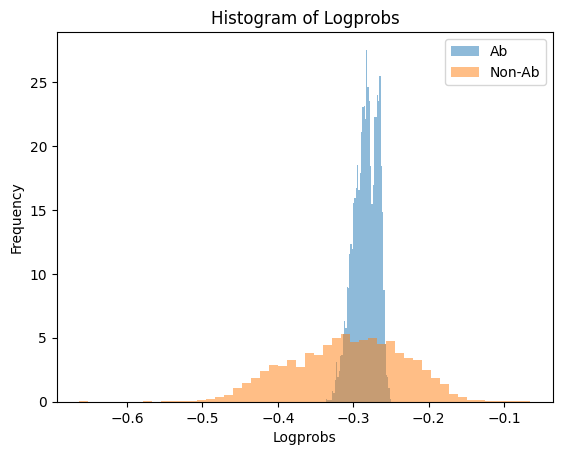

In [ ]:
# plot histogram of probs and probs_tms
import matplotlib.pyplot as plt

plt.hist(probs, bins=50, alpha=0.5, label='Ab', density=True)
plt.hist(probs_tms, bins=50, alpha=0.5, label='Non-Ab', density=True)
plt.title('Histogram of Logprobs')
plt.xlabel('Logprobs')
plt.ylabel('Frequency')
plt.legend(loc='upper right')
plt.show()

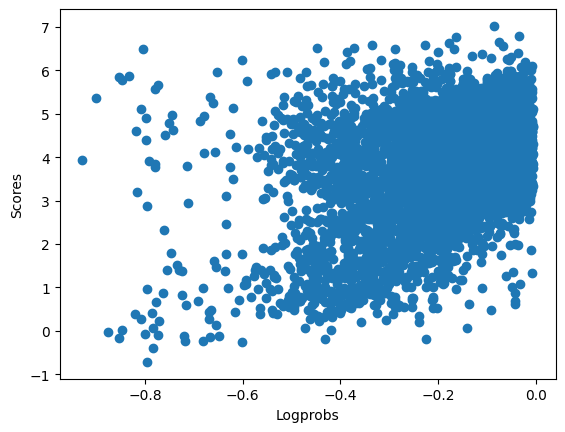

In [ ]:
import matplotlib.pyplot as plt

plt.plot(probs, scores, 'o')
plt.xlabel('Logprobs')
plt.ylabel('Scores')
plt.show()

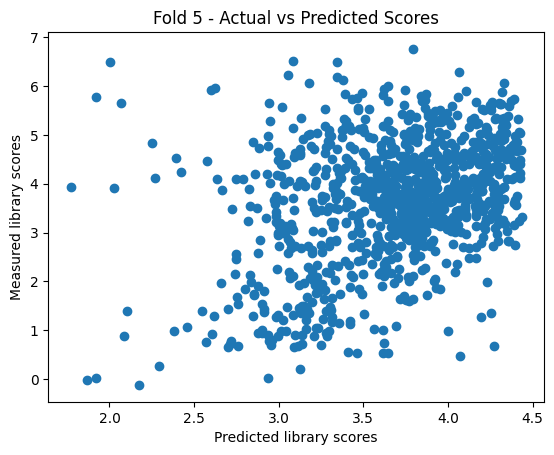

RMSE for Fold 5: 1.1705723210191026
RRMSE for Fold 5: 0.3212246470240099
R^2 for Fold 5: 0.12318248074805593
Average RMSE for all K: 1.1289208421227517
Average RRMSE for all K: 0.30836131692120833
Average R^2 for all K: 0.14735083752768713


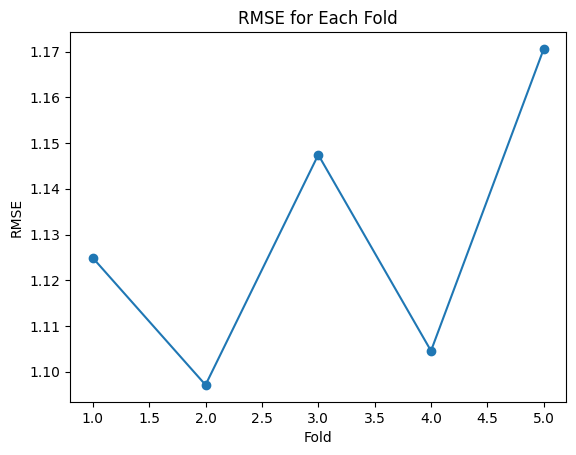

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import KFold
from sklearn.metrics import mean_squared_error, r2_score
from scipy.optimize import curve_fit

# Sample data
logprobs = np.array(probs)
logscores = np.array(scores)

# Define the exponential regression model
def exponential_model(x, a, b):
    return a * np.exp(b * x)

# Initial guess for the parameters
initial_guess = [1, 0.1]

# Number of folds for K-Fold Cross Validation
n_splits = 5

# Initialize K-Fold Cross Validation
kf = KFold(n_splits=n_splits, shuffle=True)

# List to store RMSE values for each fold
rmse_list = []
rrmse_list = []
r2_list = []

# Perform K-Fold Cross Validation
for fold, (train_index, test_index) in enumerate(kf.split(logprobs), start=1):
    logprobs_train, logprobs_test = logprobs[train_index], logprobs[test_index]
    logscores_train, logscores_test = logscores[train_index], logscores[test_index]

    # Fit the model
    params, covariance = curve_fit(exponential_model, logprobs_train, logscores_train, p0=initial_guess)

    # Predict the scores on the test set
    predicted_logscores = exponential_model(logprobs_test, *params)

    # Compute the RMSE
    rmse = np.sqrt(mean_squared_error(logscores_test, predicted_logscores))
    rmse_list.append(rmse)
    rrmse_list.append(rmse/np.average(logscores_test))

    # Compute the R^2 coefficient
    r2 = r2_score(logscores_test, predicted_logscores)
    r2_list.append(r2)

    # Plot results for fold 27
    if fold == n_splits:
        plt.scatter(predicted_logscores, logscores_test)
        #plt.scatter(logprobs_test, predicted_scores, label='Predicted Scores', color='red')
        plt.xlabel('Predicted library scores')
        plt.ylabel('Measured library scores')
        # plt.legend()
        plt.title(f'Fold {fold} - Actual vs Predicted Scores')
        plt.show()

# Print RMSE for fold 27
print(f'RMSE for Fold {n_splits}: {rmse_list[n_splits-1]}')
print(f'RRMSE for Fold {n_splits}: {rrmse_list[n_splits-1]}')
print(f'R^2 for Fold {n_splits}: {r2_list[n_splits-1]}')
print(f'Average RMSE for all K: {np.average(rmse_list)}')
print(f'Average RRMSE for all K: {np.average(rrmse_list)}')
print(f'Average R^2 for all K: {np.average(r2_list)}')
# Plot RMSE for all folds
plt.plot(range(1, n_splits + 1), rmse_list, marker='o')
plt.xlabel('Fold')
plt.ylabel('RMSE')
plt.title('RMSE for Each Fold')
plt.show()



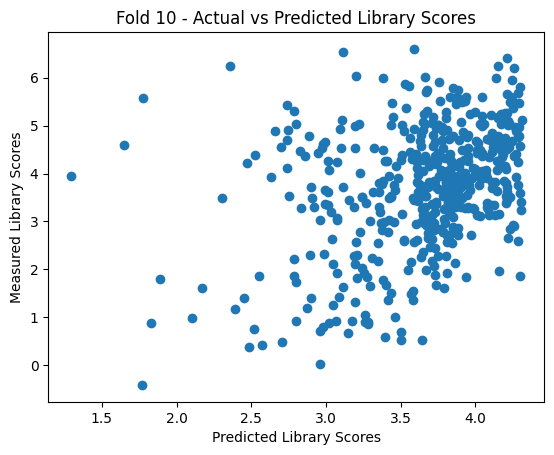



RMSE for Fold 10: 1.1766915440695036
RRMSE for Fold 10: 0.31689346111062944
R^2 for Fold 10: 0.13298241922794873


Average RMSE for all K: 1.1319853119240317
Average RRMSE for all K: 0.30921599213090417
Average R^2 for all K: 0.1410373502157343




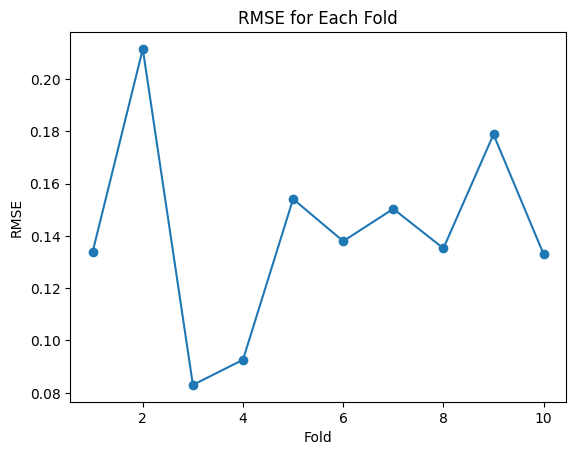

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import KFold
from sklearn.metrics import mean_squared_error, r2_score
from scipy.optimize import curve_fit


# Sample data
logprobs =  np.array(probs) # probs
logscores = np.array(scores)   # logscores

# Define the linear regression model
def linear_model(x, a, b):
    return a * x + b

# Initial guess for the parameters
initial_guess = [1, 0]

# Number of folds for K-Fold Cross Validation
n_splits = 10

# Initialize K-Fold Cross Validation
kf = KFold(n_splits=n_splits, shuffle=True)

# List to store RMSE values for each fold
rmse_list = []
rrmse_list = []
r2_list = []

# Perform K-Fold Cross Validation
for fold, (train_index, test_index) in enumerate(kf.split(logprobs), start=1):
    logprobs_train, logprobs_test = logprobs[train_index], logprobs[test_index]
    logscores_train, logscores_test = logscores[train_index], logscores[test_index]

    # Fit the model
    params, covariance = curve_fit(linear_model, logprobs_train, logscores_train, p0=initial_guess)

    # Predict the log-scores on the test set
    predicted_logscores = linear_model(logprobs_test, *params)

    # Compute the RMSE
    rmse = np.sqrt(mean_squared_error(logscores_test, predicted_logscores))
    rmse_list.append(rmse)
    rrmse_list.append(rmse / np.average(logscores_test))

    # Compute the R^2 coefficient
    r2 = r2_score(logscores_test, predicted_logscores)
    r2_list.append(r2)

    # Plot results for the last fold
    if fold == n_splits:
        plt.scatter(predicted_logscores, logscores_test)
        #plt.scatter(logprobs_test, predicted_logscores, label='Predicted Logscores', color='red')
        plt.xlabel('Predicted Library Scores')
        plt.ylabel('Measured Library Scores')

        # plot line of best fit in red
        plt.title(f'Fold {fold} - Actual vs Predicted Library Scores')
        plt.show()

print("\n")
# Print RMSE for the last fold
print(f'RMSE for Fold {n_splits}: {rmse_list[n_splits-1]}')
print(f'RRMSE for Fold {n_splits}: {rrmse_list[n_splits-1]}')
print(f'R^2 for Fold {n_splits}: {r2_list[n_splits-1]}')
print("\n")
print(f'Average RMSE for all K: {np.average(rmse_list)}')
print(f'Average RRMSE for all K: {np.average(rrmse_list)}')
print(f'Average R^2 for all K: {np.average(r2_list)}')
print("\n")

# Plot RMSE for all folds
plt.plot(range(1, n_splits + 1), r2_list, marker='o')
plt.xlabel('Fold')
plt.ylabel('RMSE')
plt.title('RMSE for Each Fold')
plt.show()


## Pluralstic Alignment (run above)

In [ ]:
import pandas as pd
import numpy as np
import plotly.graph_objects as go

# Sample data (replace this with your actual DataFrame)
df = pd.read_csv('/content/tm_library_test.csv')
df['predicted_scores'] = linear_model(np.array(probs), *params)

# Calculate Pareto frontier
def calculate_pareto_frontier(df, x_col, y_col):
    pareto_frontier = []
    for idx, (x, y) in df[[x_col, y_col]].iterrows():
        if not any(
            (df[x_col] >= x) & (df[y_col] >= y) & ((df[x_col] > x) | (df[y_col] > y))
        ):
            pareto_frontier.append((x, y))
    return np.array(sorted(pareto_frontier, key=lambda point: point[0]))

# Calculate Pareto frontier for actual scores
actual_pareto_frontier = calculate_pareto_frontier(df, 'avg_induction_score', 'avg_retention_score')

# Create an interactive 3D plot
fig = go.Figure()

# Add scatter points
fig.add_trace(go.Scatter3d(
    x=df['avg_induction_score'],
    y=df['avg_retention_score'],
    z=df['predicted_scores'],
    mode='markers',
    marker=dict(size=5, color=df['predicted_scores'], colorscale='Viridis', opacity=0.8),
    name='Actual Scores'
))

# Add Pareto frontier line
fig.add_trace(go.Scatter3d(
    x=actual_pareto_frontier[:, 0],
    y=actual_pareto_frontier[:, 1],
    z=[df['predicted_scores'].max()] * len(actual_pareto_frontier),  # Approximate z values
    mode='lines',
    line=dict(color='red', width=4, dash='dash'),
    name='Pareto Frontier'
))

# Update layout
fig.update_layout(
    scene=dict(
        xaxis_title='Induction Score',
        yaxis_title='Retention Score',
        zaxis_title='Predicted Scores'
    ),
    title='Interactive 3D Plot of Actual vs Predicted Scores',
    margin=dict(l=0, r=0, b=0, t=40)
)

# Show plot
fig.show()


### Negative Controls

In [ ]:
df = pd.read_csv('/content/tm_library_annotated.csv')
df_evolved = pd.read_csv('/content/efficient_mutation_g1_g2_tmd_only.csv')
neg_controls = pd.read_csv("/content/100RandomHumanProteinSeqs.csv")
neg_seqs = neg_controls['RandomSubstring'].to_list()

In [ ]:
# Negative controls
max_length = 50
out = get_sequence_probs(neg_seqs, model, tokenizer, max_length, device)
neg_array = out.cpu().numpy()

# Positive samples
pos_seqs = df['aa_seq'].to_list()
max_length = 50
out = get_sequence_probs(pos_seqs, model, tokenizer, max_length, device)
pos_array = out.cpu().numpy()

evolved_seqs = df_evolved['Subsequence'].to_list()
evolved_array = get_sequence_probs(evolved_seqs, model, tokenizer, max_length, device).cpu().numpy()

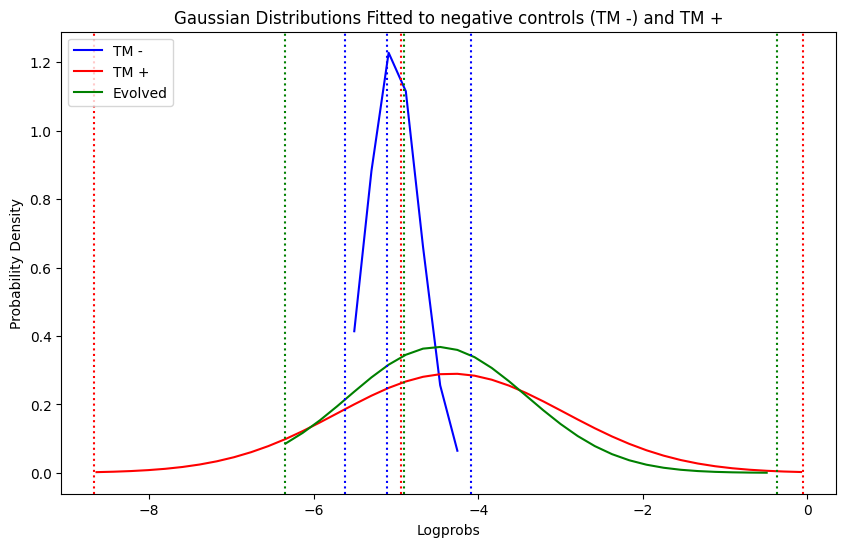

In [ ]:
# characterization of distributions
import matplotlib.pyplot as plt
import numpy as np
from scipy.stats import norm

# Data for the two distributions
distribution_1 = [np.max(neg_array), np.min(neg_array), np.mean(neg_array), np.std(neg_array), np.median(neg_array)]
distribution_2 = [np.max(pos_array), np.min(pos_array), np.mean(pos_array), np.std(pos_array), np.median(pos_array)]
distribution_3 = [np.max(evolved_array), np.min(evolved_array), np.mean(evolved_array), np.std(evolved_array), np.median(evolved_array)]

# Extracting statistics
max1, min1, mean1, std1, median1 = distribution_1
max2, min2, mean2, std2, median2 = distribution_2
max3, min3, mean3, std3, median3 = distribution_3

# Generate points on the x axis
x = np.linspace(min(min1, min2) - 100, max(max1, max2) + 100, 1000)

# Calculate the Gaussian distributions
x1_filtered = x[(x >= min1) & (x <= max1)]
y1_filtered = norm.pdf(x1_filtered, mean1, std1)

x2_filtered = x[(x >= min2) & (x <= max2)]
y2_filtered = norm.pdf(x2_filtered, mean2, std2)

x3_filtered = x[(x >= min3) & (x <= max3)]
y3_filtered = norm.pdf(x3_filtered, mean3, std3)

# Plotting the distributions
fig, ax = plt.subplots(figsize=(10, 6))

ax.plot(x1_filtered, y1_filtered, label='TM -', color='blue')
ax.plot(x2_filtered, y2_filtered, label='TM +', color='red')
ax.plot(x3_filtered, y3_filtered, label='Evolved', color='green')

# Marking max, min, and median on the plots
ax.axvline(max1, color='blue', linestyle='dotted')
ax.axvline(min1, color='blue', linestyle='dotted')
ax.axvline(median1, color='blue', linestyle='dotted')

ax.axvline(max2, color='red', linestyle='dotted')
ax.axvline(min2, color='red', linestyle='dotted')
ax.axvline(median2, color='red', linestyle='dotted')

ax.axvline(max3, color='green', linestyle='dotted')
ax.axvline(min3, color='green', linestyle='dotted')
ax.axvline(median3, color='green', linestyle='dotted')

# Adding labels, title, and legend
ax.set_xlabel('Logprobs')
ax.set_ylabel('Probability Density')
ax.set_title('Gaussian Distributions Fitted to negative controls (TM -) and TM +')
ax.legend()

plt.show()


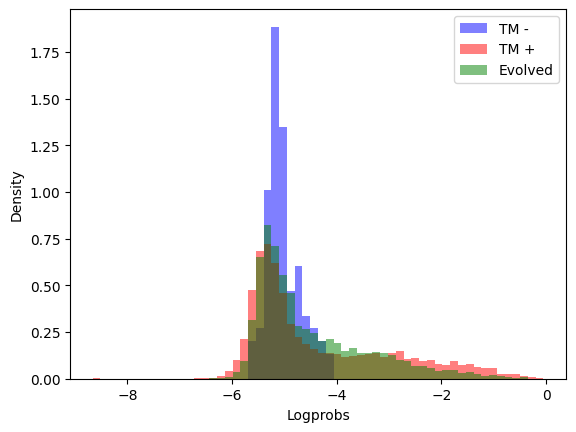

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Sample data
array1 = neg_array
array2 = pos_array
array3 = evolved_array

# Combine arrays to find the optimal binning
combined_array = np.concatenate([array1, array2, array3])

# Find optimal bin edges using numpy's histogram_bin_edges
bin_edges = np.histogram_bin_edges(combined_array, bins='auto')

# Plot normalized histograms with the optimal binning
plt.hist(array1, bins=bin_edges, alpha=0.5, color='blue', label='TM -', density=True)
plt.hist(array2, bins=bin_edges, alpha=0.5, color='red', label='TM +', density=True)
plt.hist(array3, bins=bin_edges, alpha=0.5, color='green', label='Evolved', density=True)

# Add labels and legend
plt.xlabel('Logprobs')
plt.ylabel('Density')
ax.set_title('Gaussian Distributions Fitted to negative controls (TM -) and TM + and evolved seqs')
plt.legend(loc='upper right')

# Show the plot
plt.show()


In [ ]:
# Cosmic-forest-70

In [ ]:
07/25 - v1 (10%)
07/26 - v2 (8%)
07/26 - v1 (10%)
07/27 - v1 (6%, 50k steps)
07/31 - v1 (27%, 50k steps)

## Attention inspection


In [ ]:
def get_embedding(sequences, max_length=40):

  tokens = tokenizer(sequences, padding="max_length", max_length=max_length, truncation=True, return_tensors="pt").to(device)
  input_ids = tokens["input_ids"]
  attention_mask = tokens["attention_mask"]
  embeddings = model.esm.embeddings(input_ids, attention_mask)
  #print(embeddings.shape)

  return embeddings

def get_param_by_name(model, param_name):
    for name, param in model.named_parameters():
        if name == param_name:
            return param
    print(f"Error fetching param: {param_name}")
    return None  # If the parameter name is not found

def compute_attention(model, x):
  layers = model_size[0]
  attention_sum = None
  for layer_indx in range(layers):
    attention = model.esm.encoder.layer[layer_indx].attention(x)
    attention_sum = attention[0] if attention_sum is None else attention_sum + attention[0]
    return attention[0]/layers



# out = get_param_by_name(model, "esm.encoder.layer.0.attention.self.original_layer.weight")
# print(out)

In [ ]:
# sequence = 'GLGDFIFYSVLVGKASATAS'
import matplotlib.pyplot as plt
import numpy as np

def plot_attention(attention_heatmap):
  # Plot the heatmap
  plt.figure(figsize=(12, 8))
  plt.imshow(attention_heatmap, aspect='auto', cmap='viridis')

  # Add color bar
  plt.colorbar()

  # Add labels and title
  plt.xlabel('Token positions')
  plt.ylabel('Attention value')
  plt.title('Heatmap of Token Attentions')

  # Display the plot
  plt.show()

def get_relative_attention_scores(sequence, indexes=None, ignore_padding=True):
  embedding = get_embedding([sequence])
  attention = compute_attention(model, embedding)
  if(ignore_padding):
    attention_heatmap = attention[:, 0:len(sequence), :]
  else:
    attention_heatmap = attention
  attention_heatmap = torch.sum(attention_heatmap, dim=2).detach().cpu()

  if(indexes):
    ln = len(indexes[1])
    avg_for_cutsite = np.average((attention_heatmap[:, indexes[0]:indexes[0]+ln]))
    avg_overall = np.average(attention_heatmap)
    return avg_for_cutsite, avg_overall
  else:
    return attention_heatmap


In [ ]:
cutsite_averages = []
overall_averages = []
for hit in hits:
  sequence = hit[0]
  indexes = hit[1][0]
  avg_for_cutsite, avg_overall = get_relative_attention_scores(sequence, indexes)
  cutsite_averages.append(avg_for_cutsite)
  overall_averages.append(avg_overall)


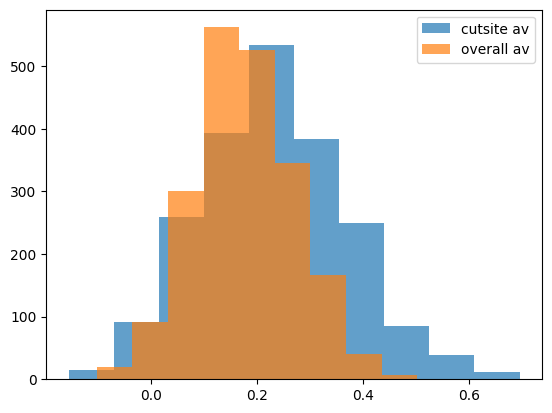

In [ ]:
plt.hist(cutsite_averages, label='cutsite av', alpha=0.7)
plt.hist(overall_averages, label='overall av', alpha=0.7)
plt.legend()
plt.show()

In [ ]:
from scipy import stats

# Perform Kolmogorov-Smirnov test
ks_statistic, p_value = stats.ks_2samp(cutsite_averages, overall_averages, )

print(f"K-S test statistic: {ks_statistic}")
print(f"P-value: {p_value}")

print(f"Mean of probs_ala_delta: {np.mean(cutsite_averages)}, median of probs_ala_delta: {np.median(cutsite_averages)}")
print(f"Mean of probs_random_delta: {np.mean(overall_averages)}, , median of probs_random_delta: {np.median(overall_averages)}")

K-S test statistic: 0.21699029126213593
P-value: 7.084337100767199e-43
Mean of probs_ala_delta: 0.23170801997184753, median of probs_ala_delta: 0.22690638899803162
Mean of probs_random_delta: 0.17720721662044525, , median of probs_random_delta: 0.1713344305753708


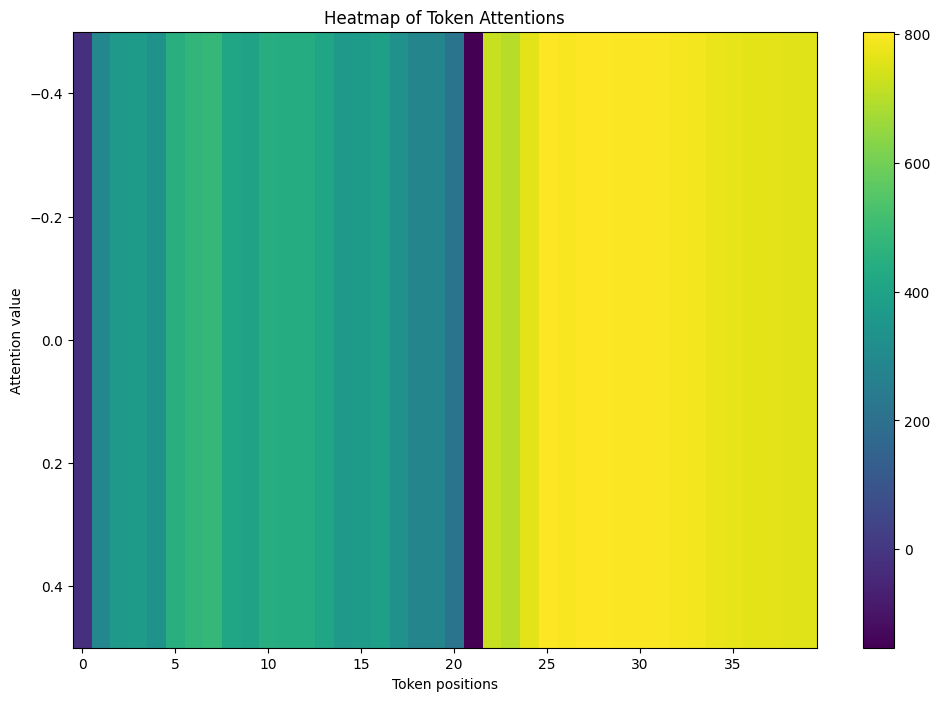

In [ ]:
heat_map_sum = None
for hit in hits:
  sequence = hit[0]
  indexes = hit[1][0]
  heat_map = get_relative_attention_scores(sequence, None, False)
  heat_map_sum = heat_map if heat_map_sum is None else heat_map_sum + heat_map

plot_attention(heat_map_sum)
